In [28]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Sources of Error

Error can come from many sources when using applying a numerical method:
 - Model/Data Error
 - Truncation Error
 - Floating Point Error
 
**Goal:** Categorize and understand each type of error and explore some simple approaches to analyzing error.

## Model and Data Error

Errors in fundamental formulation
 - Lotka-Volterra - fractional rabbits, no extinctions, etc.
 - Data Error - Inaccuracy in measurement or uncertainties in parameters
 
Unfortunatley we cannot control model and data error directly but we can use methods that may be more robust in the presense of these types of errors.

## Truncation Error

Errors arising from approximating a function with a simpler function (e.g. $sin(x) \approx x$ for $|x| \approx 0$. 

## Floating Point Error

Errors arising from approximating real numbers with finite-precision numbers and arithmetic.

## Basic Definitions

Given a true value of a function $f$ and an approximate solution $\hat{f}$ define:

Absolute Error:  $e = |f - \hat{f}|$

Relative Error:  $r = \frac{e}{|f|} = \frac{|f - \hat{f}|}{|f|}$

Decimal precision p (number of significant digits): $\text{round}(10^{-n} \cdot x) \cdot 10^n$

with $n = \text{floor}(\log_{10} x) + 1 - p$.

In [10]:
f = numpy.exp(1)
f_hat = 2.71

# Error
print "Absolute Error = ", numpy.abs(f - f_hat)
print "Relative Error = ", numpy.abs(f - f_hat) / numpy.abs(f)

# Precision
p = 3
n = numpy.floor(numpy.log10(f_hat)) + 1 - p
print "%s = %s" % (f_hat, numpy.round(10**(-n) * f_hat) * 10**n)

Absolute Error =  0.00828182845905
Relative Error =  0.00304671442539
2.71 = 2.71


## Truncation Error and Taylor's Theorem

**Taylor's Theorem:**  Let $f(x) \in C^{m+1}[a,b]$ and $x_0 \in [a,b]$, then for all $x \in (a,b)$ there exists a number $c = c(x)$ that lies between $x_0$ and $x$ such that

$$ f(x) = T_N(x) + R_N(x)$$

where $T_N(x)$ is the Taylor polynomial approximation

$$T_N(x) = \sum^N_{n=0} \frac{f^{(n)}(x_0)\cdot(x-x_0)^n}{n!}$$

and $R_N(x)$ is the residual (the part of the series we left off)

$$R_N(x) = \frac{f^{(n+1)}(c) \cdot (x - x_0)^{n+1}}{(n+1)!}$$

#### Example 1

$f(x) = e^x$ with $x_0 = 0$

Here we will use the package sympy which has the ability to calculate Taylor polynomials built-in!

In [19]:
import sympy
x = sympy.symbols('x')
f = sympy.symbols('f', cls=Function)

f = exp(x)
f.series(x0=0, n=3)

1 + x + x**2/2 + O(x**3)

Using this we can find expressions for the relative and absolute error as a function of $x$ assuming $N=2$.

$$T_N(x) = \sum^N_n=0 \frac{x^n}{n!} = 1 + x + \frac{x^2}{2}$$

$$R_N(x) = e^c \frac{x^{n+1}}{(n+1)!} = e^c \cdot \frac{x^3}{6}$$

$$e^1 = 2.718\ldots$$

$$T_2(1) = 2.5 \Rightarrow e \approx 0.2 ~~ r \approx 0.1$$

Lets do this numerically for a section of $x$.

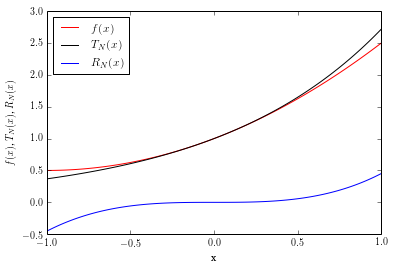

In [33]:
x = numpy.linspace(-1, 1, 100)
T_N = 1.0 + x + x**2 / 2.0
R_N = numpy.exp(1) * x**3 / 6.0

plt.plot(x, T_N, 'r', x, numpy.exp(x), 'k', x, R_N, 'b')
plt.xlabel("x")
plt.ylabel("$f(x)$, $T_N(x)$, $R_N(x)$")
plt.legend(["$f(x)$", "$T_N(x)$", "$R_N(x)$"], loc=2)
plt.show()

#### Example 2

$f(x) = \frac{1}{x} ~~ x_0  = 1$, approximate with $\hat{f}(x) = T_2(x)$

### Symbols and Definitions

Big-O notation:

Rules for error propagation: